In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
m_df = pd.read_csv('/Users/cindywang/PycharmProjects/bpd-subtyping/data/daily_medications.csv')

In [3]:
m_df.head()

,PatientSeqID,DSB,Calfactant (Infasurf),Nystatin cream,Gentamicin,Caffeine Citrate,Ampicillin,Multivitamins with Iron,Furosemide,Vitamin - K1 (Pytonadione),...,Gabapentin,FloraTummys,Cholestyramine Topical,Acetaminophen IV,Ciprofloxacin Ophthalmic,Ertapenem,Drops Not Coded,Pentamidine,Darbepoietin,Methicillin
0,5232405,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5232405,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5232405,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5232405,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5232405,4,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
justdex = m_df.loc[:, ['DSB', 'Dexamethasone']]
justpid = m_df.loc[:, ['DSB', 'PatientSeqID']]

In [19]:
dex = justdex.groupby('DSB').sum().reset_index()
dex

,DSB,Dexamethasone
0,0,18
1,1,32
2,2,40
3,3,43
4,4,62
...,...,...
397,397,0
398,398,0
399,399,0
400,400,1


In [22]:
pid = justpid.groupby('DSB').count().reset_index()
pid

,DSB,PatientSeqID
0,0,83753
1,1,82548
2,2,81512
3,3,80903
4,4,80584
...,...,...
397,397,1
398,398,1
399,399,1
400,400,1


In [29]:
dex['Dexamethasone']/=pid['PatientSeqID']

In [30]:
dex

,DSB,Dexamethasone
0,0,0.000215
1,1,0.000388
2,2,0.000491
3,3,0.000532
4,4,0.000769
...,...,...
397,397,0.000000
398,398,0.000000
399,399,0.000000
400,400,1.000000


<AxesSubplot:xlabel='DSB', ylabel='Dexamethasone'>

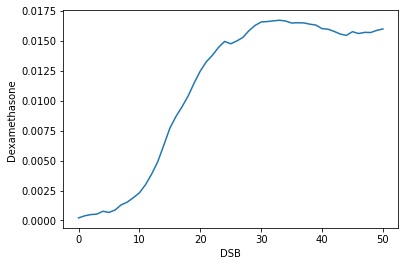

In [33]:
sns.lineplot(data=dex.loc[dex['DSB'] <= 50], x='DSB', y='Dexamethasone')